## Problem Statement

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

## About the dataset (Telecom Churn Data)
1.Customer ID: Primary key of the record

2.Churn: Detecting which customers are likely to leave a service or to cancel a subscription to a service

3.Monthly Revenue: Revenue of each Customer

4.Monthly Minutes: Number of Minutes call spoken by Customer

5.Total Recurring Charge: The Charges for the Service

6.Director Assisted Calls: When we call an operator to request a telephone number

7.Overage Minutes: Count of Call used over duration to particular post-paid cell phone plan

8.Roaming Calls: The ability to get access to the Internet when away from home at the price of a local call or at a charge considerably less than the regular long-distance charges

9.PercChangeMinutes: It indicates Percentage Change in Minutes

10.PercChangeRevenues: Percentage change in Revenue

11.Three way Calls: A way of adding a third party to your conversation without the assistance of a telephone operator

12.Dropped Calls: Count of Phone calls gets disconnected somehow from the cellular network

13.Blocked Calls: Count of Telephone call that is unable to connect to an intended recipient

14.Unanswered Calls: Count of Calling that an individual perceives but is not currently pursuing

15.Received Calls: Number of calls received by the customer

16.Out bound Calls: Call initiated by the call centre agent to customer on behalf of client to know the target customer behaviour and needs

17.Inbound Calls: In inbound calls, call-centre or customer-care receives call from customer with issues and questions

18.Peak Calls In Out: Amount of time period with fewer calls than are handled in a busy period

19.CustomerCareCalls: Customer Care Calls Attempt Count

20.OffPeakCallsInOut: Amount of time period with more calls than are handled in a busy period

21.Call Forwarding Calls: Count of Calls Forwarded by user

22.Dropped Blocked Calls: Number of VM messages customer currently has on the server

23.Call Waiting Calls: Duration of call-in waiting period

24.Months In Service: Number of months customer using service

25.Unique Subs: subscription of different networks

26.Active Subs: subscriptions of the networks that are active or in usage

27.Handset Models: Count of Handsets are used to Contact one to one

28.CurrentEquipmentDays: Number of days Current Equipment is used

29.Age HH1: User aged below 45

30.Age HH2: User aged above 45

31.Children in HH: Whether there are Children in House hold

32.Handset Refurbished: Are the handsets refurbished or not

33.Handset Web Capable: Are the handsets capable of internet connectivity

34.Truck Owner: Is the user a Truck Owner

35.RV Owner: Is the user an RV owner

36.Home Ownership: Is the house the user is staying, his own

37.Buys Visa Mail Order: Does the user buy Visa Mail order

38.Responds to Mail Offers: Does the user respond to Mail offers

39.Opt-out Mailings: Did he opt out of the mail offers sent to him

40.Non-US-Travel: Does the user travel to other countries

41.Owns-Computer: Does he have a computer or not

42.Has-Credit Card: Does he have a credit card or not

43.Retention Calls: No of Retention Calls

44.Retention Offers Accepted: Customers accepting retaining the retaining offers given by the company

45.New Cell phone User: Number of customers buying new cell phone

46.NotNewCellphoneUser: Number of customers uses exisiting cell phone

47.Referrals Made By Subscriber: Referrals made by the existing customer to the other customer

48.Income Group: SThe column talks about the customer saying to which category the customer belongs to

49.Owns Motorcycle: The columns ask about the customer weather the customer owns a motorcycle or not

50.AdjustmentsToCreditRating: Adjustments made To CreditRating

51.Handset Price: Its amount paid by the customer for his cell phone

52.MadeCallToRetentionTeam: User call to Retention in same company

53.CreditRating: Credit card user rating (out of 7)

54.PrizmCode: Grouping of region according to users

55.Occupation: Occupation of User

56.MaritalStatus: Marital Status Indicated by Yes/No/Unknown

In [596]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [597]:
#load the dataset
df=pd.read_csv("cell2celltrain.csv")
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,MILMIL414,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,PITHOM412,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,OKCTUL918,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


No of variables and observations in the dataset

In [598]:
df.shape

(51047, 58)

Drop the unnecessary columns

In [599]:
df=df.drop(["CustomerID","ServiceArea"],axis=1)

In [600]:
# As the CustomerID and ServiceArea contains many unique ids and are not significant in analysis so
# we drop both the columns

In [601]:
df.shape

(51047, 56)

## 5-point summary

In [602]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,50891.000000,58.834492,44.507336,-6.170000,33.610000,48.460000,71.065000,1223.380000
MonthlyMinutes,50891.000000,525.653416,529.871063,0.000000,158.000000,366.000000,723.000000,7359.000000
TotalRecurringCharge,50891.000000,46.830088,23.848871,-11.000000,30.000000,45.000000,60.000000,400.000000
DirectorAssistedCalls,50891.000000,0.895229,2.228546,0.000000,0.000000,0.250000,0.990000,159.390000
OverageMinutes,50891.000000,40.027785,96.588076,0.000000,0.000000,3.000000,41.000000,4321.000000
RoamingCalls,50891.000000,1.236244,9.818294,0.000000,0.000000,0.000000,0.300000,1112.400000
PercChangeMinutes,50680.000000,-11.547908,257.514772,-3875.000000,-83.000000,-5.000000,66.000000,5192.000000
PercChangeRevenues,50680.000000,-1.191985,39.574915,-1107.700000,-7.100000,-0.300000,1.600000,2483.500000
DroppedCalls,51047.000000,6.011489,9.043955,0.000000,0.700000,3.000000,7.700000,221.700000
BlockedCalls,51047.000000,4.085672,10.946905,0.000000,0.000000,1.000000,3.700000,384.300000


1.We can observe that count for every column is different, so null values are persent

2.In most of the columns there is high difference between mean abd standard deviation , that indicates
the date is not normally distributed

3.In most of the columns there is large difference between the 75% value and max value, this indicates 
that there are outliers present

# Check for the datatype

In [603]:
df.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

# Changing the datatype

In [604]:
df["HandsetPrice"].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [605]:
#Replacing the word Unknown with np.nan
df["HandsetPrice"]=df["HandsetPrice"].replace("Unknown",np.nan)

In [606]:
#Convering the datatype from object to float
df["HandsetPrice"]=df["HandsetPrice"].astype(float)

In [607]:
# RetentionCalls,RetentionOffersAccepted,IncomeGroup,HandsetPrice,CreditRating-7,PrizmCode-4,occupation-8
# maritalstatus-3

In [608]:
obj=[]
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
print("Object datatypes:",obj)

Object datatypes: ['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


In [609]:
#since we have NewCellphoneUser and NotNewCellphoneUser, so NotNewCellphoneUser is redandent for analysis
df=df.drop("NotNewCellphoneUser",axis=1)

In [610]:
num=[]
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype =="float64":
        num.append(i)
print("numerical datatypes:",num)

numerical datatypes: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice']


In [611]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('COLUMN NAME: ',i)
        print()
        print('NO OF UNIQUE CLASSES: ',df[i].nunique())
        print()
        print(df[i].describe())
        print()

COLUMN NAME:  Churn

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      36336
Name: Churn, dtype: object

COLUMN NAME:  ChildrenInHH

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      38679
Name: ChildrenInHH, dtype: object

COLUMN NAME:  HandsetRefurbished

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      43956
Name: HandsetRefurbished, dtype: object

COLUMN NAME:  HandsetWebCapable

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top         Yes
freq      46046
Name: HandsetWebCapable, dtype: object

COLUMN NAME:  TruckOwner

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      41524
Name: TruckOwner, dtype: object

COLUMN NAME:  RVOwner

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      46894
Name: RVOwner, dtype: object

COLUMN NAME:  Homeownership

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
t

## The variable MaritalStatus:

In [612]:
# df["MaritalStatus"].isnull().sum()

In [613]:
# df["MaritalStatus"].value_counts()

In [614]:
# df["MaritalStatus"]=df["MaritalStatus"].replace("Unknown",np.nan)

In [615]:
# RetentionCalls,RetentionOffersAccepted,IncomeGroup,HandsetPrice,CreditRating-7,PrizmCode-4,occupation-8
# maritalstatus-3

## The variable IncomeGroup:

In [616]:
df["IncomeGroup"].unique()

array([4, 5, 6, 9, 1, 7, 3, 0, 8, 2], dtype=int64)

In [617]:
income_grp={1:"High income",
           2:"High income",
           3:"High income",
           4:"Medium income",
           5:"Medium income",
           6:"Medium income",
           7:"Medium income",
           8:"Low income",
           9:"Low income",
           0:"Low income"}

In [618]:
df["IncomeGroup"]=df["IncomeGroup"].replace(income_grp)

## The variable Occupation:

In [619]:
df["Occupation"].unique()

array(['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker',
       'Clerical', 'Student'], dtype=object)

In [620]:
df['Occupation'] = df['Occupation'].replace({'Crafts':'Professional','Clerical':'Professional','Self':'Professional',
                                            'Retired':'Professional','Student':'Professional','Homemaker':'Professional'})

## The variable CreditRating:

In [621]:
df["CreditRating"].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [622]:
df['CreditRating'] = df['CreditRating'].replace({'1-Highest':'Highest','2-High':'Highest',
                                                 '3-Good':'Medium','4-Medium':'Medium',
                                                 '5-Low':'Low','6-VeryLow':'Low','7-Lowest':'Low'})

In [623]:
Total=df.isnull().sum()
Percentage=df.isnull().sum()*100/df.isnull().count()
missing_pct=pd.concat([Total,Percentage],axis=1,keys=["total","percentage"])
missing_pct[missing_pct["total"]>0].sort_values(by="total",ascending=True)

,total,percentage
Handsets,1,0.001959
HandsetModels,1,0.001959
CurrentEquipmentDays,1,0.001959
MonthlyRevenue,156,0.305601
MonthlyMinutes,156,0.305601
TotalRecurringCharge,156,0.305601
DirectorAssistedCalls,156,0.305601
OverageMinutes,156,0.305601
RoamingCalls,156,0.305601
PercChangeMinutes,367,0.718945


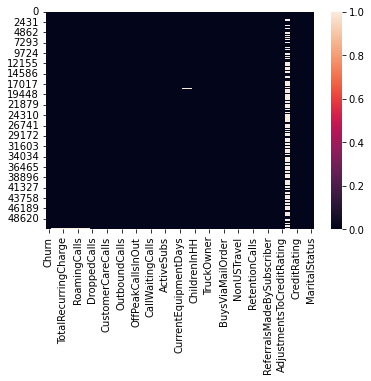

In [624]:
#plotting Heatmap to visualize missing Values
sns.heatmap(df.isna())
plt.show()

# Null value treatment

In [625]:
drop_cols=["Handsets","HandsetModels","CurrentEquipmentDays","MonthlyRevenue","MonthlyMinutes","TotalRecurringCharge",
          "DirectorAssistedCalls","OverageMinutes","RoamingCalls","PercChangeMinutes","PercChangeRevenues"]
df.dropna(subset=drop_cols,inplace=True)


In [626]:
df=df.reset_index(drop=True)

In [627]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,0,Medium income,No,0,30.000000,Yes,Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,0,Medium income,No,0,30.000000,No,Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,NaN,No,Medium,Town,Professional,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,10.000000,No,Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,0,Low income,No,1,10.000000,No,Highest,Other,Professional,Yes


## The variable AgeHH1:

In [628]:
print("mean",df["AgeHH1"].mean())
print("median",df["AgeHH1"].median())

mean 31.34195194471231
median 36.0


In [629]:
df["AgeHH1"]=df["AgeHH1"].replace(np.nan,36)

In [630]:
df["AgeHH1"].isnull().sum()

0

## The variable AgeHH2:

In [631]:
print("mean",df["AgeHH2"].mean())
print("median",df["AgeHH2"].median())

mean 21.15057457409193
median 0.0


In [632]:
df["AgeHH2"]=df["AgeHH2"].replace(np.nan,0)

In [633]:
df["AgeHH2"].isnull().sum()

0

## The variable HandsetPrice:

In [634]:
# Since HandsetPrice column contains 56.775129% nullvalues so we can drop the column

In [635]:
df=df.drop("HandsetPrice",axis=1)

## The variabel MaritalStatus:

In [636]:
# df["MaritalStatus"]=df["MaritalStatus"].ffill()

In [637]:
# df["MaritalStatus"].value_counts()

In [638]:
# df["MaritalStatus"].isnull().sum()

In [639]:
# df.isnull().sum().sum()

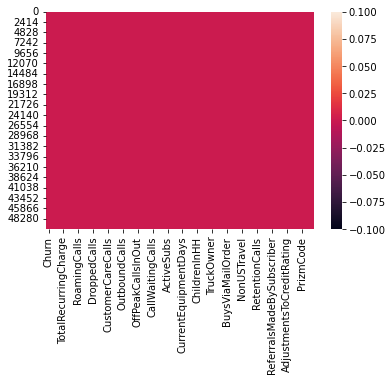

In [640]:
#plotting Heatmap to visualize missing Values
sns.heatmap(df.isna())
plt.show()

## Marital Status

In [641]:
from sklearn.preprocessing import StandardScaler

In [642]:
num_cols=df.select_dtypes(include=np.number)
num_cols.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating'],
      dtype='object')

In [643]:
ss=StandardScaler()
num_scaled=ss.fit_transform(num_cols)

In [644]:
num_scaled

array([[-0.78384318, -0.58007432, -1.04564478, ..., -0.12798936,
        -0.16932285, -0.14024483],
       [-0.9413339 , -0.97439777, -1.25550802, ..., -0.12798936,
        -0.16932285, -0.14024483],
       [-0.46931109, -0.9781712 , -0.3740824 , ..., -0.12798936,
        -0.16932285, -0.14024483],
       ...,
       [ 0.29432791,  0.37271678,  0.96904235, ..., -0.12798936,
        -0.16932285, -0.14024483],
       [ 1.31655722, -0.26876634, -0.70986359, ..., -0.12798936,
        -0.16932285, -0.14024483],
       [ 0.81510319,  2.29905286,  1.59863208, ..., -0.12798936,
        -0.16932285,  2.47664321]])

In [645]:
df_filled=pd.DataFrame(df_filled,columns=num_cols.columns)
df_filled.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,1.396147,-0.870072,4.784978,-0.127989,-0.169323,-0.140245
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,0.391562,0.889028,-0.175702,-0.127989,-0.169323,-0.140245
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.247719,0.218894,-0.175702,-0.127989,-0.169323,-0.140245
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.065067,-0.870072,-0.175702,-0.127989,-0.169323,-0.140245
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,0.665540,1.391628,-0.175702,-0.127989,-0.169323,2.476643


In [646]:
df_filled.isnull().sum()

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
ReferralsMadeBySubscriber    0
Adjustme

In [647]:
num_scaled=df_filled

In [648]:
scaled_cols=num_scaled.columns

In [649]:
num_scaled.shape

(50679, 33)

In [650]:
df['MaritalStatus'].value_counts()

Unknown    19556
Yes        18520
No         12603
Name: MaritalStatus, dtype: int64

In [651]:
dict_1={'Unknown':np.nan,'Yes':1,'No':0 }

In [652]:
mar=df['MaritalStatus']

In [653]:
mar.isnull().sum()

0

In [654]:
mar.shape

(50679,)

In [655]:
mar=mar.map(dict_1)

In [656]:
num_scaled.shape

(50679, 33)

In [657]:
num_scaled.isnull().sum()

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
ReferralsMadeBySubscriber    0
Adjustme

In [658]:
mar.shape

(50679,)

In [659]:
mar.isnull().sum()

19556

In [660]:
df_mar=pd.concat([num_scaled,mar],axis=1)

In [661]:
df_mar.isnull().sum()

MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         0
HandsetModels                    0
CurrentEquipmentDays             0
AgeHH1                           0
AgeHH2              

In [662]:
x_train = df_mar[scaled_cols][~(df_mar['MaritalStatus'].isnull()==True)]

In [663]:
x_train.shape

(31123, 33)

In [664]:
y_train=df_mar['MaritalStatus'][~(df_mar['MaritalStatus'].isnull()==True)]

In [665]:
y_train.shape

(31123,)

In [666]:
x_test= df_mar[scaled_cols][(df_mar['MaritalStatus'].isnull()==True)]

In [667]:
x_test.shape

(19556, 33)

In [668]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [669]:
y_pred.shape

(19556,)

In [670]:
index_list=df_mar[df_mar['MaritalStatus'].isnull()==True].index

In [671]:
index_list

Int64Index([   10,    12,    13,    15,    16,    17,    19,    23,    34,
               44,
            ...
            50646, 50647, 50652, 50655, 50664, 50665, 50670, 50671, 50675,
            50676],
           dtype='int64', length=19556)

In [672]:
df_mar['MaritalStatus'][index_list]=y_pred

In [673]:
df_mar.shape

(50679, 34)

In [674]:
dict_2={1:'Yes',0:'No' }

In [675]:
df_mar['MaritalStatus']=df_mar['MaritalStatus'].map(dict_2)

In [676]:
df_mar['MaritalStatus'].value_counts()

No     28050
Yes    22629
Name: MaritalStatus, dtype: int64

In [677]:
df['New_maritalstatus']=df_mar['MaritalStatus']

In [730]:
df['New_maritalstatus'].value_counts()

No     28050
Yes    22629
Name: New_maritalstatus, dtype: int64

<AxesSubplot:xlabel='New_maritalstatus', ylabel='count'>

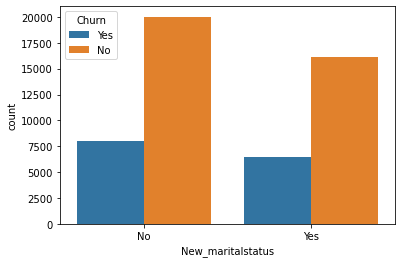

In [678]:
sns.countplot(df['New_maritalstatus'],hue=df['Churn'])

In [679]:
df=df.drop('MaritalStatus',axis=1)

In [680]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,0,Medium income,No,0,Yes,Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Town,Professional,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,0,Low income,No,1,No,Highest,Other,Professional,Yes


In [681]:
df.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

In [682]:
df_cat=df[['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
           'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
           'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
           'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
           'New_maritalstatus']]

In [683]:
num=[]
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype =="float64":
        num.append(i)
print("numerical datatypes:",num)

numerical datatypes: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating']


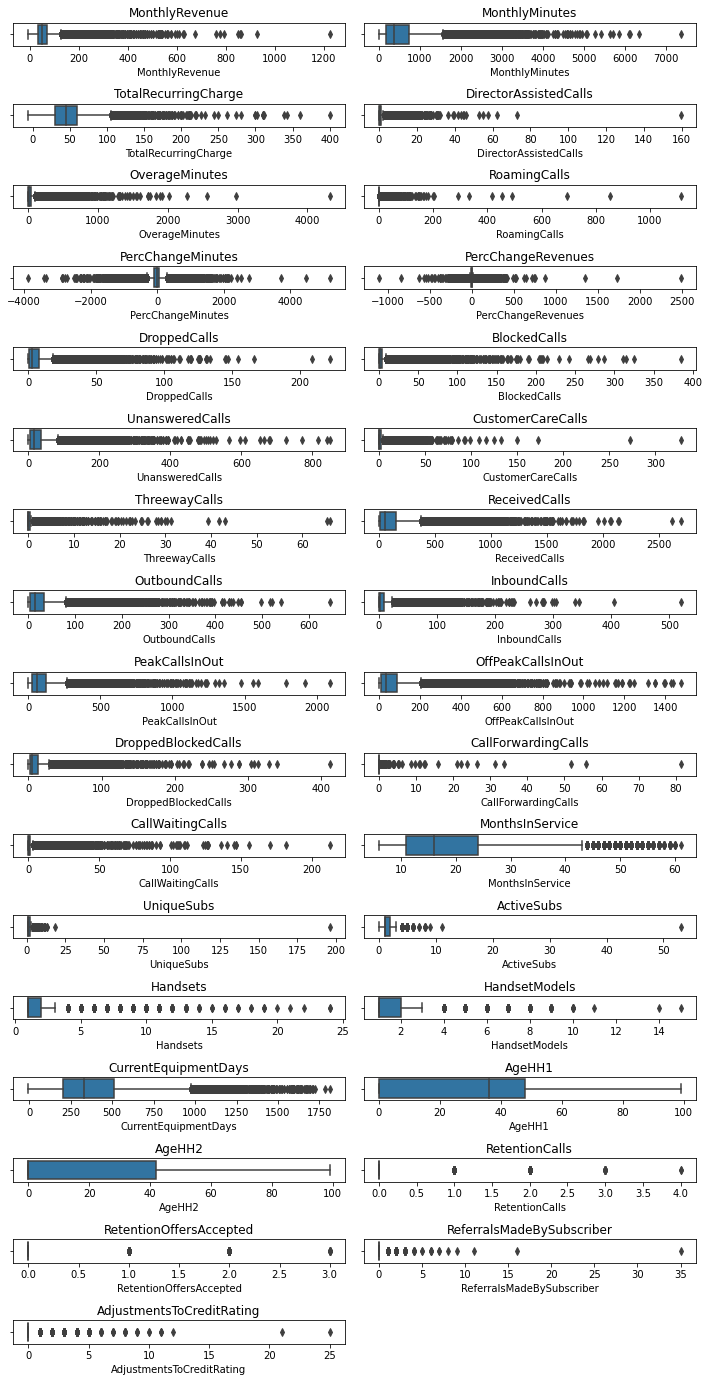

In [684]:
df_num=df[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
           'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
           'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
           'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
           'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
           'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1',
           'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
           'AdjustmentsToCreditRating']]
iterator=1
plt.figure(figsize=(10,20))
for i in df_num:
    plt.subplot(18,2,iterator)
    sns.boxplot(df_num[i])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

In [685]:
# From the above plot we can observe that there are many outliers present in all the variables
# and some have extreme outliers .

In [686]:
# Reason for outliers exist in the data:

# Variability in the Data
# An experimental measurment error

In [687]:
# Impact of outliers on Dataset:

# it causes various problem during statstical analysis
# It effects the mean and standard deviation

# Skewness before transformation

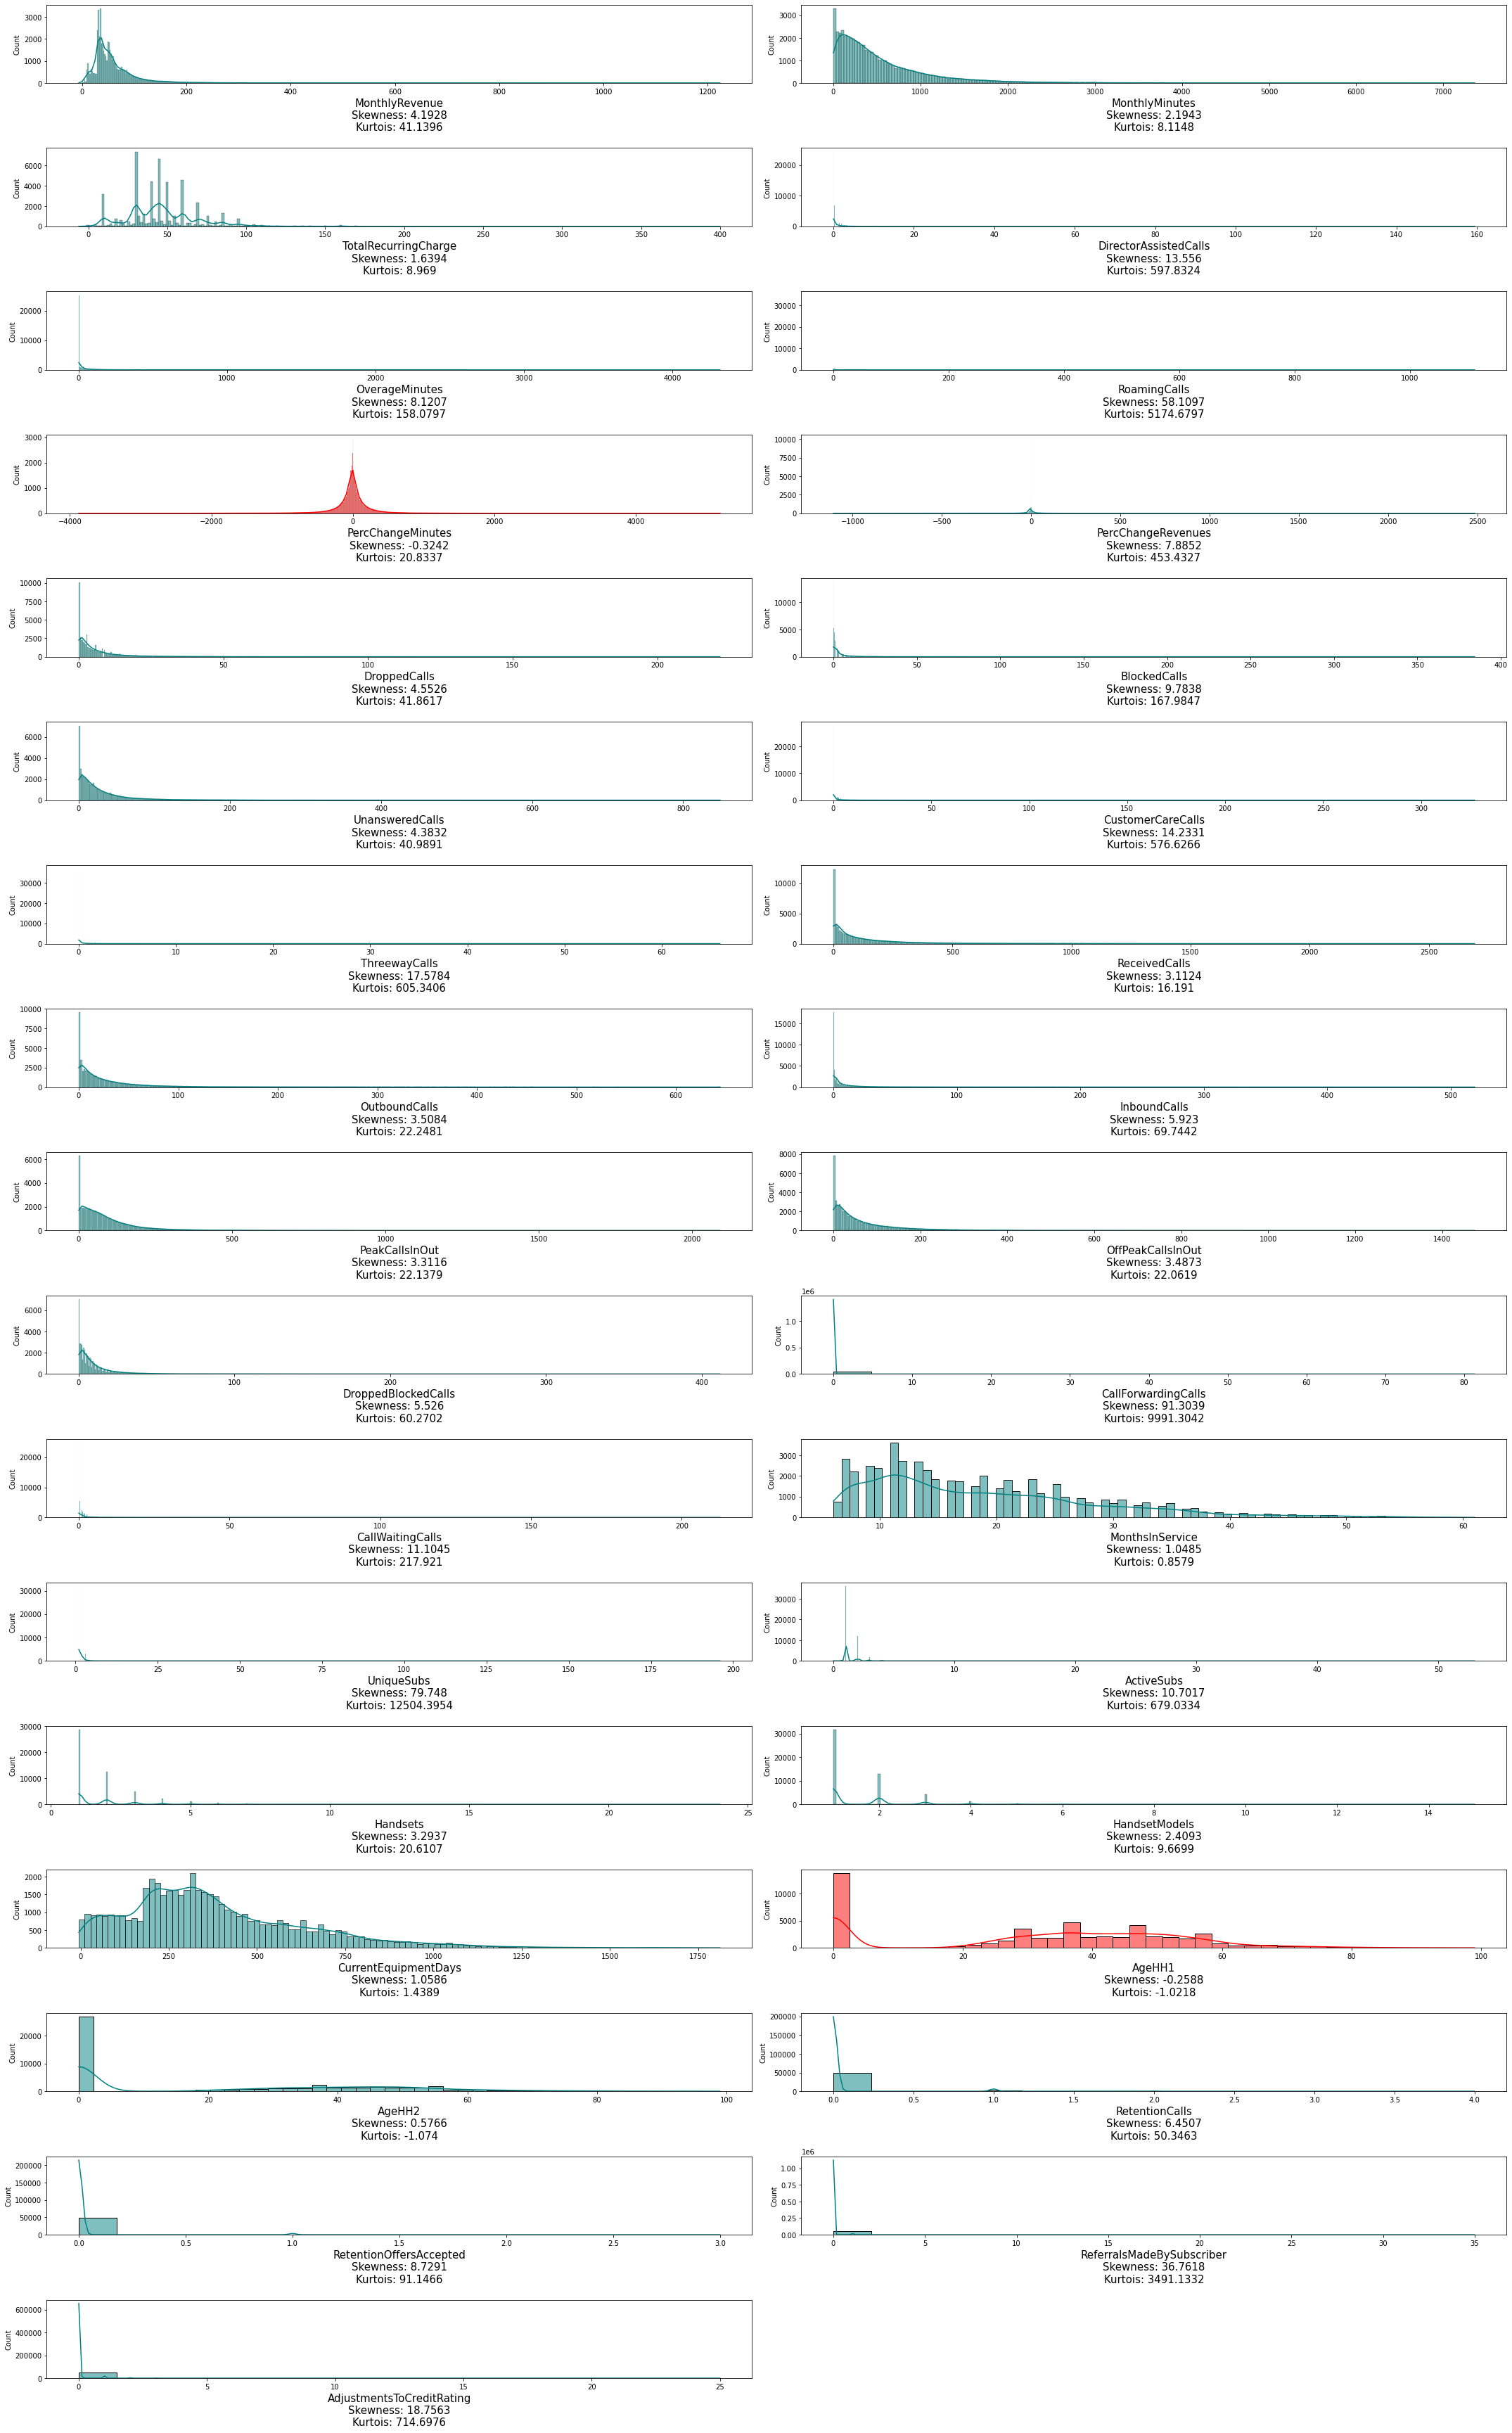

In [688]:
plt.figure(figsize=(30,50))
n=1
for i in df.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df[i].skew()<0:
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

Inference: Here by visualizing dist plot we can see that the Features plotted in Teal color are positively skewed and Features plotted in red color are Negatively Skewed

--: To reduce the impact of skewness we can use various transformation techiniques

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#                                   4.Descriptive statistics(EDA)

# 4.1.Univariate Analysis

### Check for the imbalance

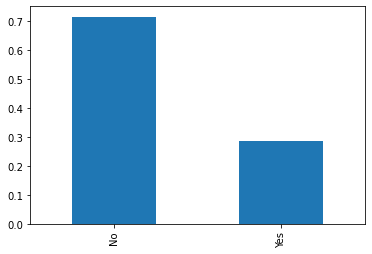

In [689]:
df['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [690]:
df['Churn'].value_counts(normalize=True)

No    0.713826
Yes   0.286174
Name: Churn, dtype: float64

### Univariate Analysis on Categorical Columns

In [691]:
df_cat.head()

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Highest,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes
2,No,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Medium,Town,Professional,Yes
3,No,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,Medium,Other,Other,No
4,Yes,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Highest,Other,Professional,Yes


In [692]:
df_cat.head(2)

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Highest,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes


In [693]:
def annot_percent(axes):
    for p in plot.patches:
        total= sum(p.get_height() for p in plot.patches)/100
        percent=round((p.get_height()/total),2)
        x=p.get_x() + p.get_width()/2
        y=p.get_height()
        plot.annotate(f"{percent}%",(x,y),ha="center",va="bottom")

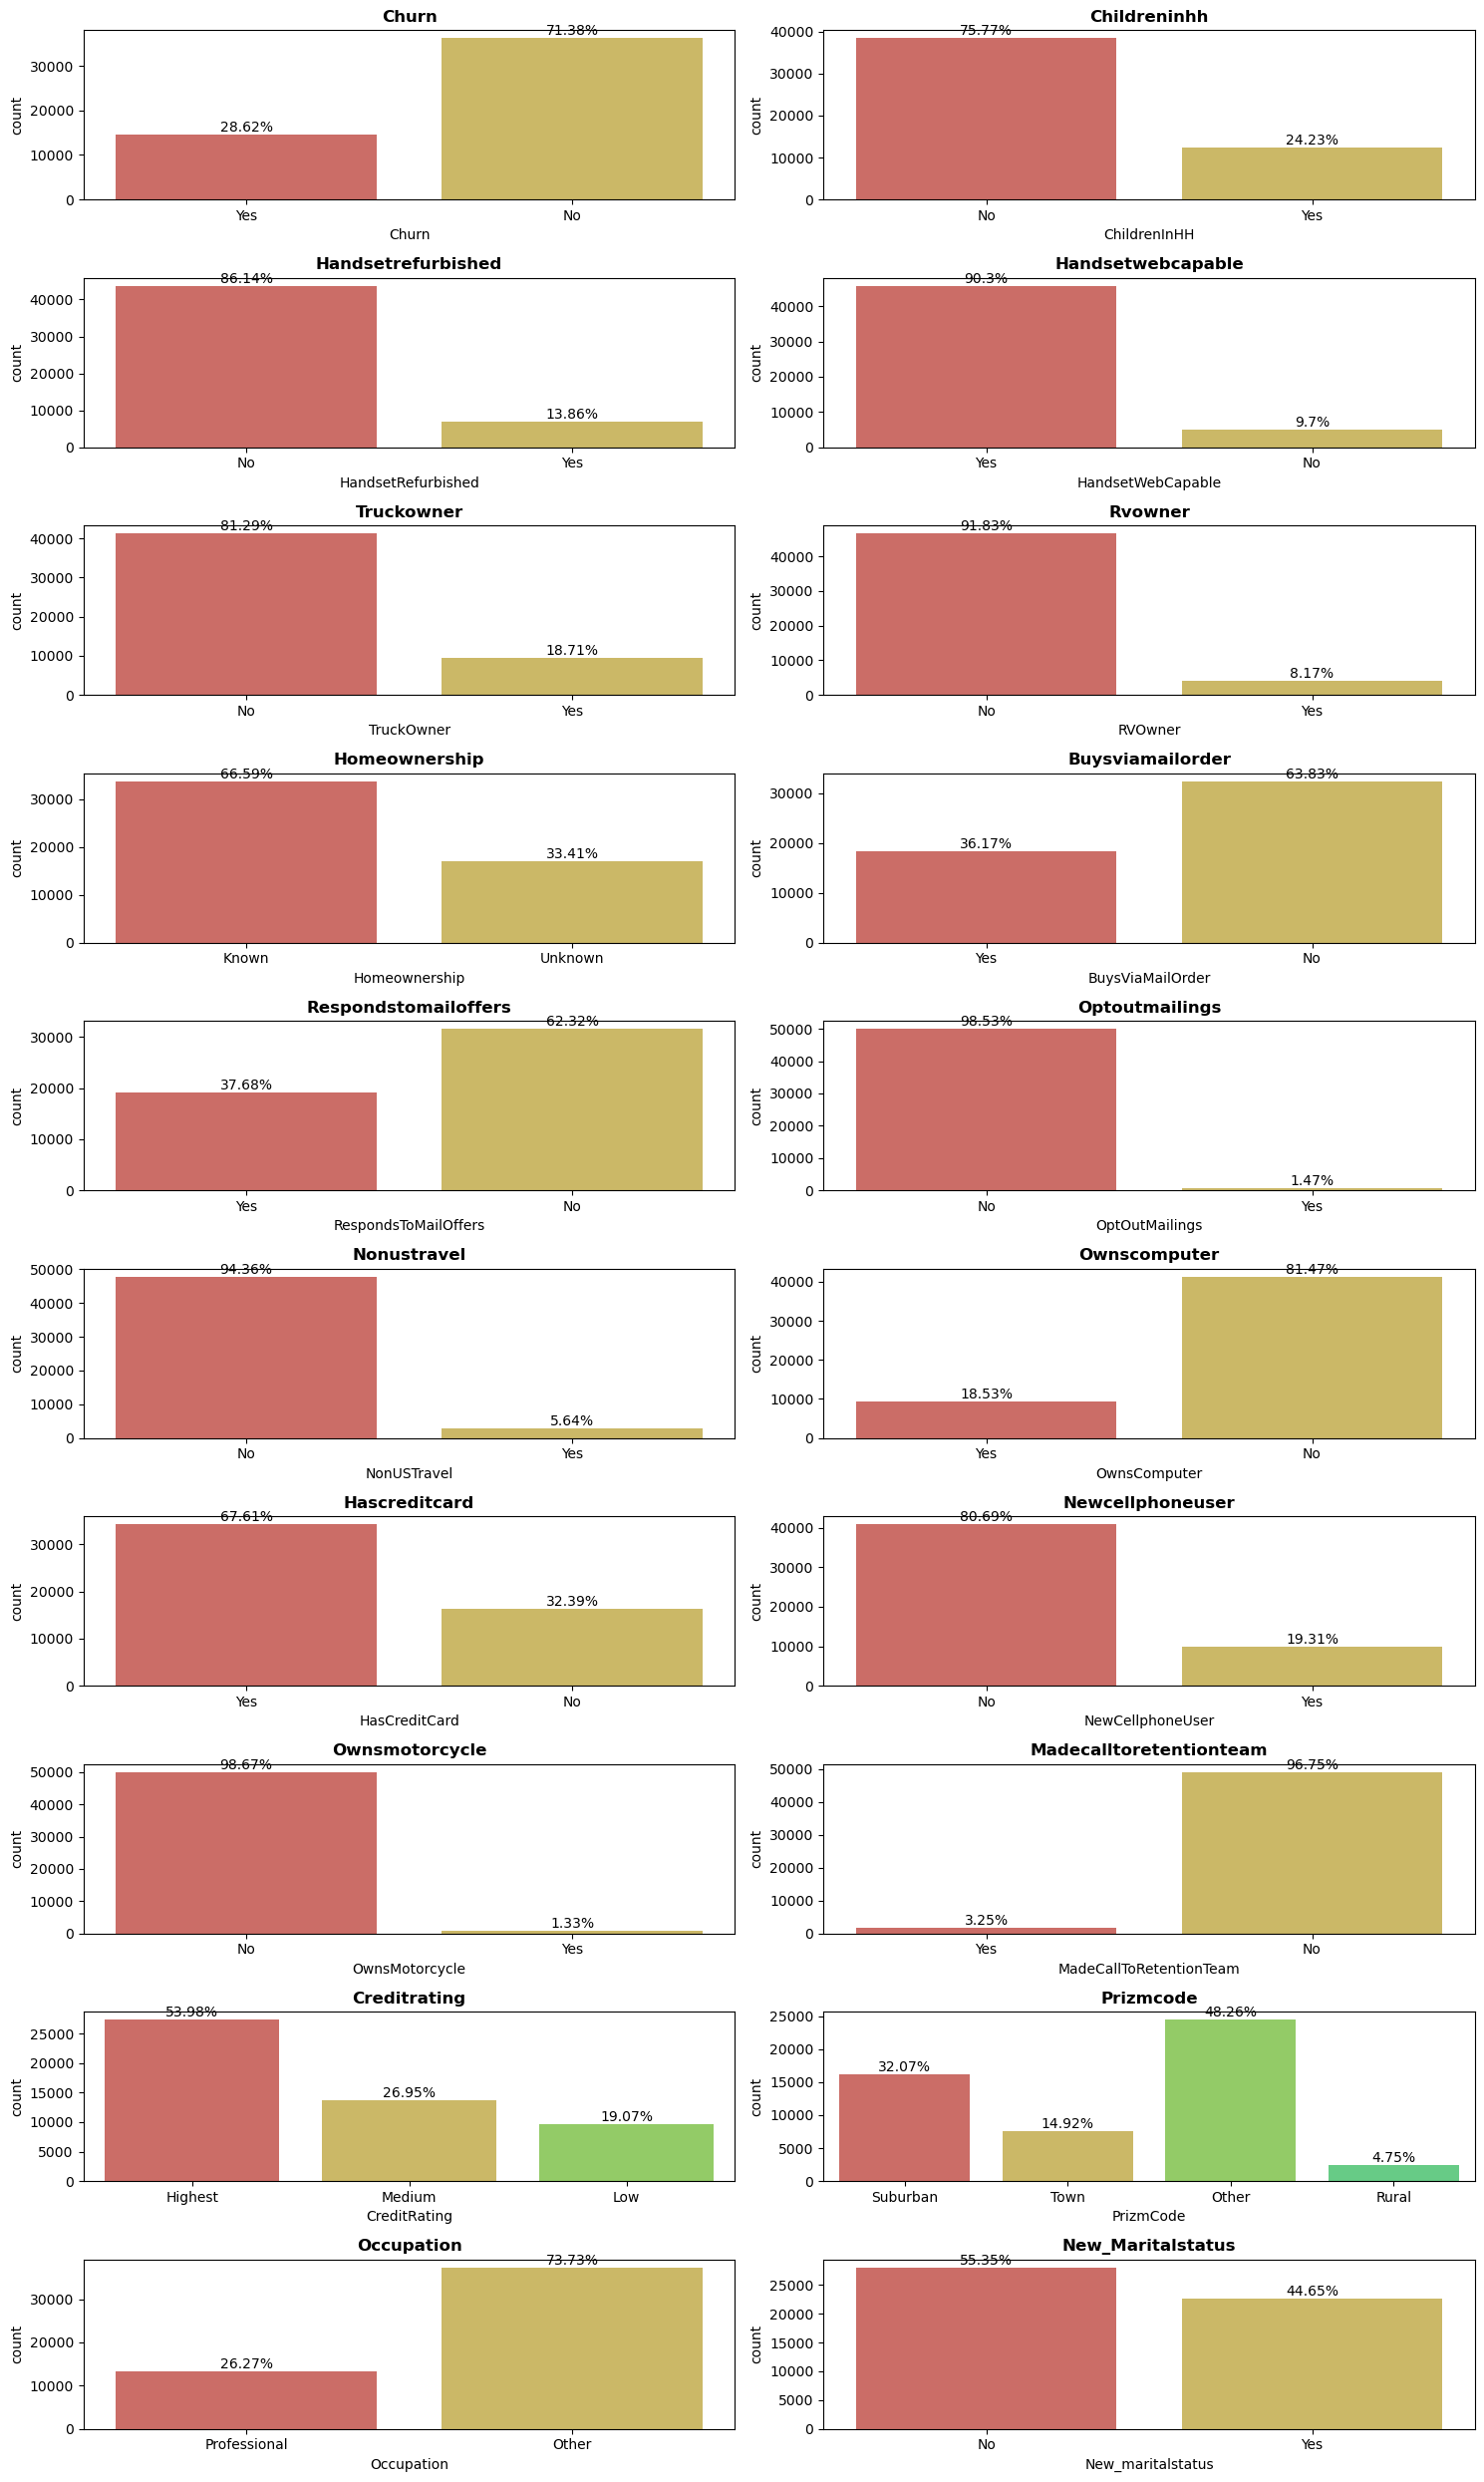

In [694]:
#plotting countplot for some categorical variable
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(10,2,n)
    n+=1
    sns.countplot(df[i],palette=sns.color_palette("hls",8))
    plt.title(f"{i.title()}",weight="bold")
    plt.tight_layout()
    annot_percent(plot)

Obeservations
1) Churn Over 28 percent of people in the data have churned.

2) Handsetweb capable More than 90 percent of the people in the data have internet support on their phone.

3) More than 65 percent of them don't have a credit card

4) Less than 2 percent of them own a motorcycle

5) Over 70 percent of the data has occupations other than the ones mentioned.

6) New Martial status around 45 percent are married.

## Univariate Analysis on Numerical Columns

In [695]:
df_num.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,1,0,0,0
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,0,0,0,0


In [696]:
df_num.shape

(50679, 33)

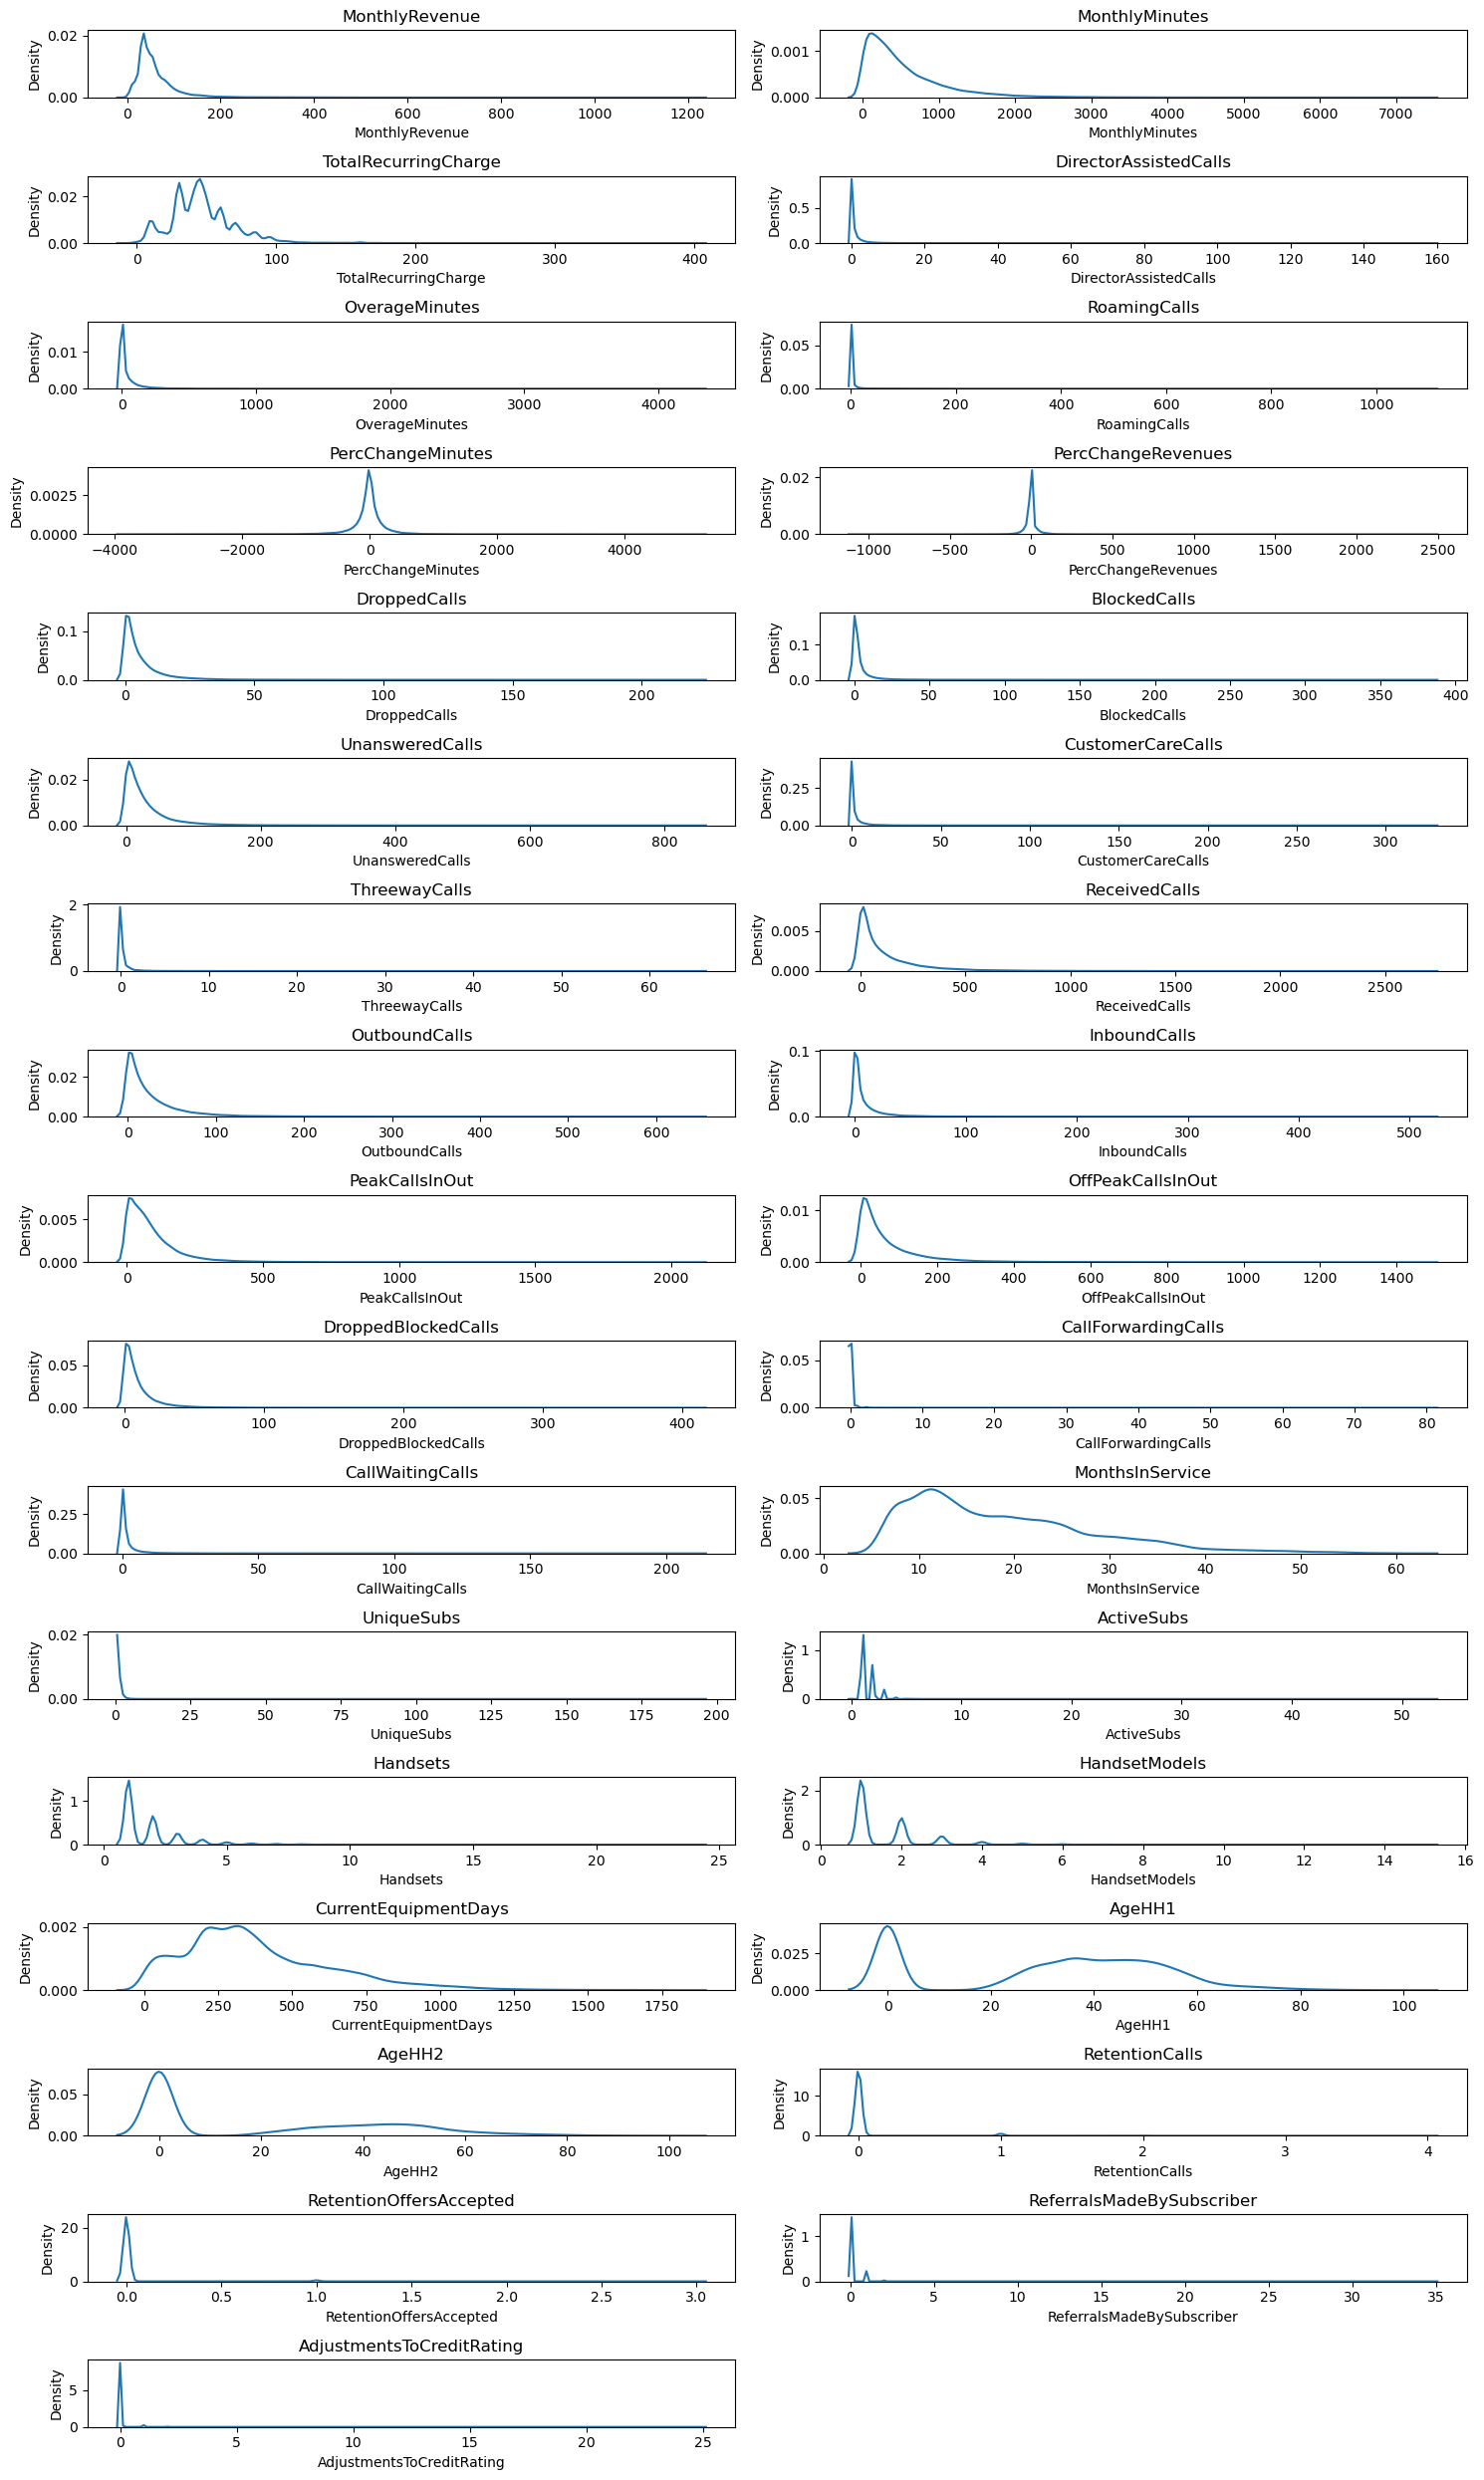

In [697]:
# Kde Plot for Numerical features
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_num:
    plot=plt.subplot(17,2,n)
    n+=1
    plt.title(i)
    sns.kdeplot(data=df[i])
    plt.tight_layout()
    annot_percent(plot)

# 4.2.Bivariate Analysis

## Bivariate Analysis on Categorical - Categorical

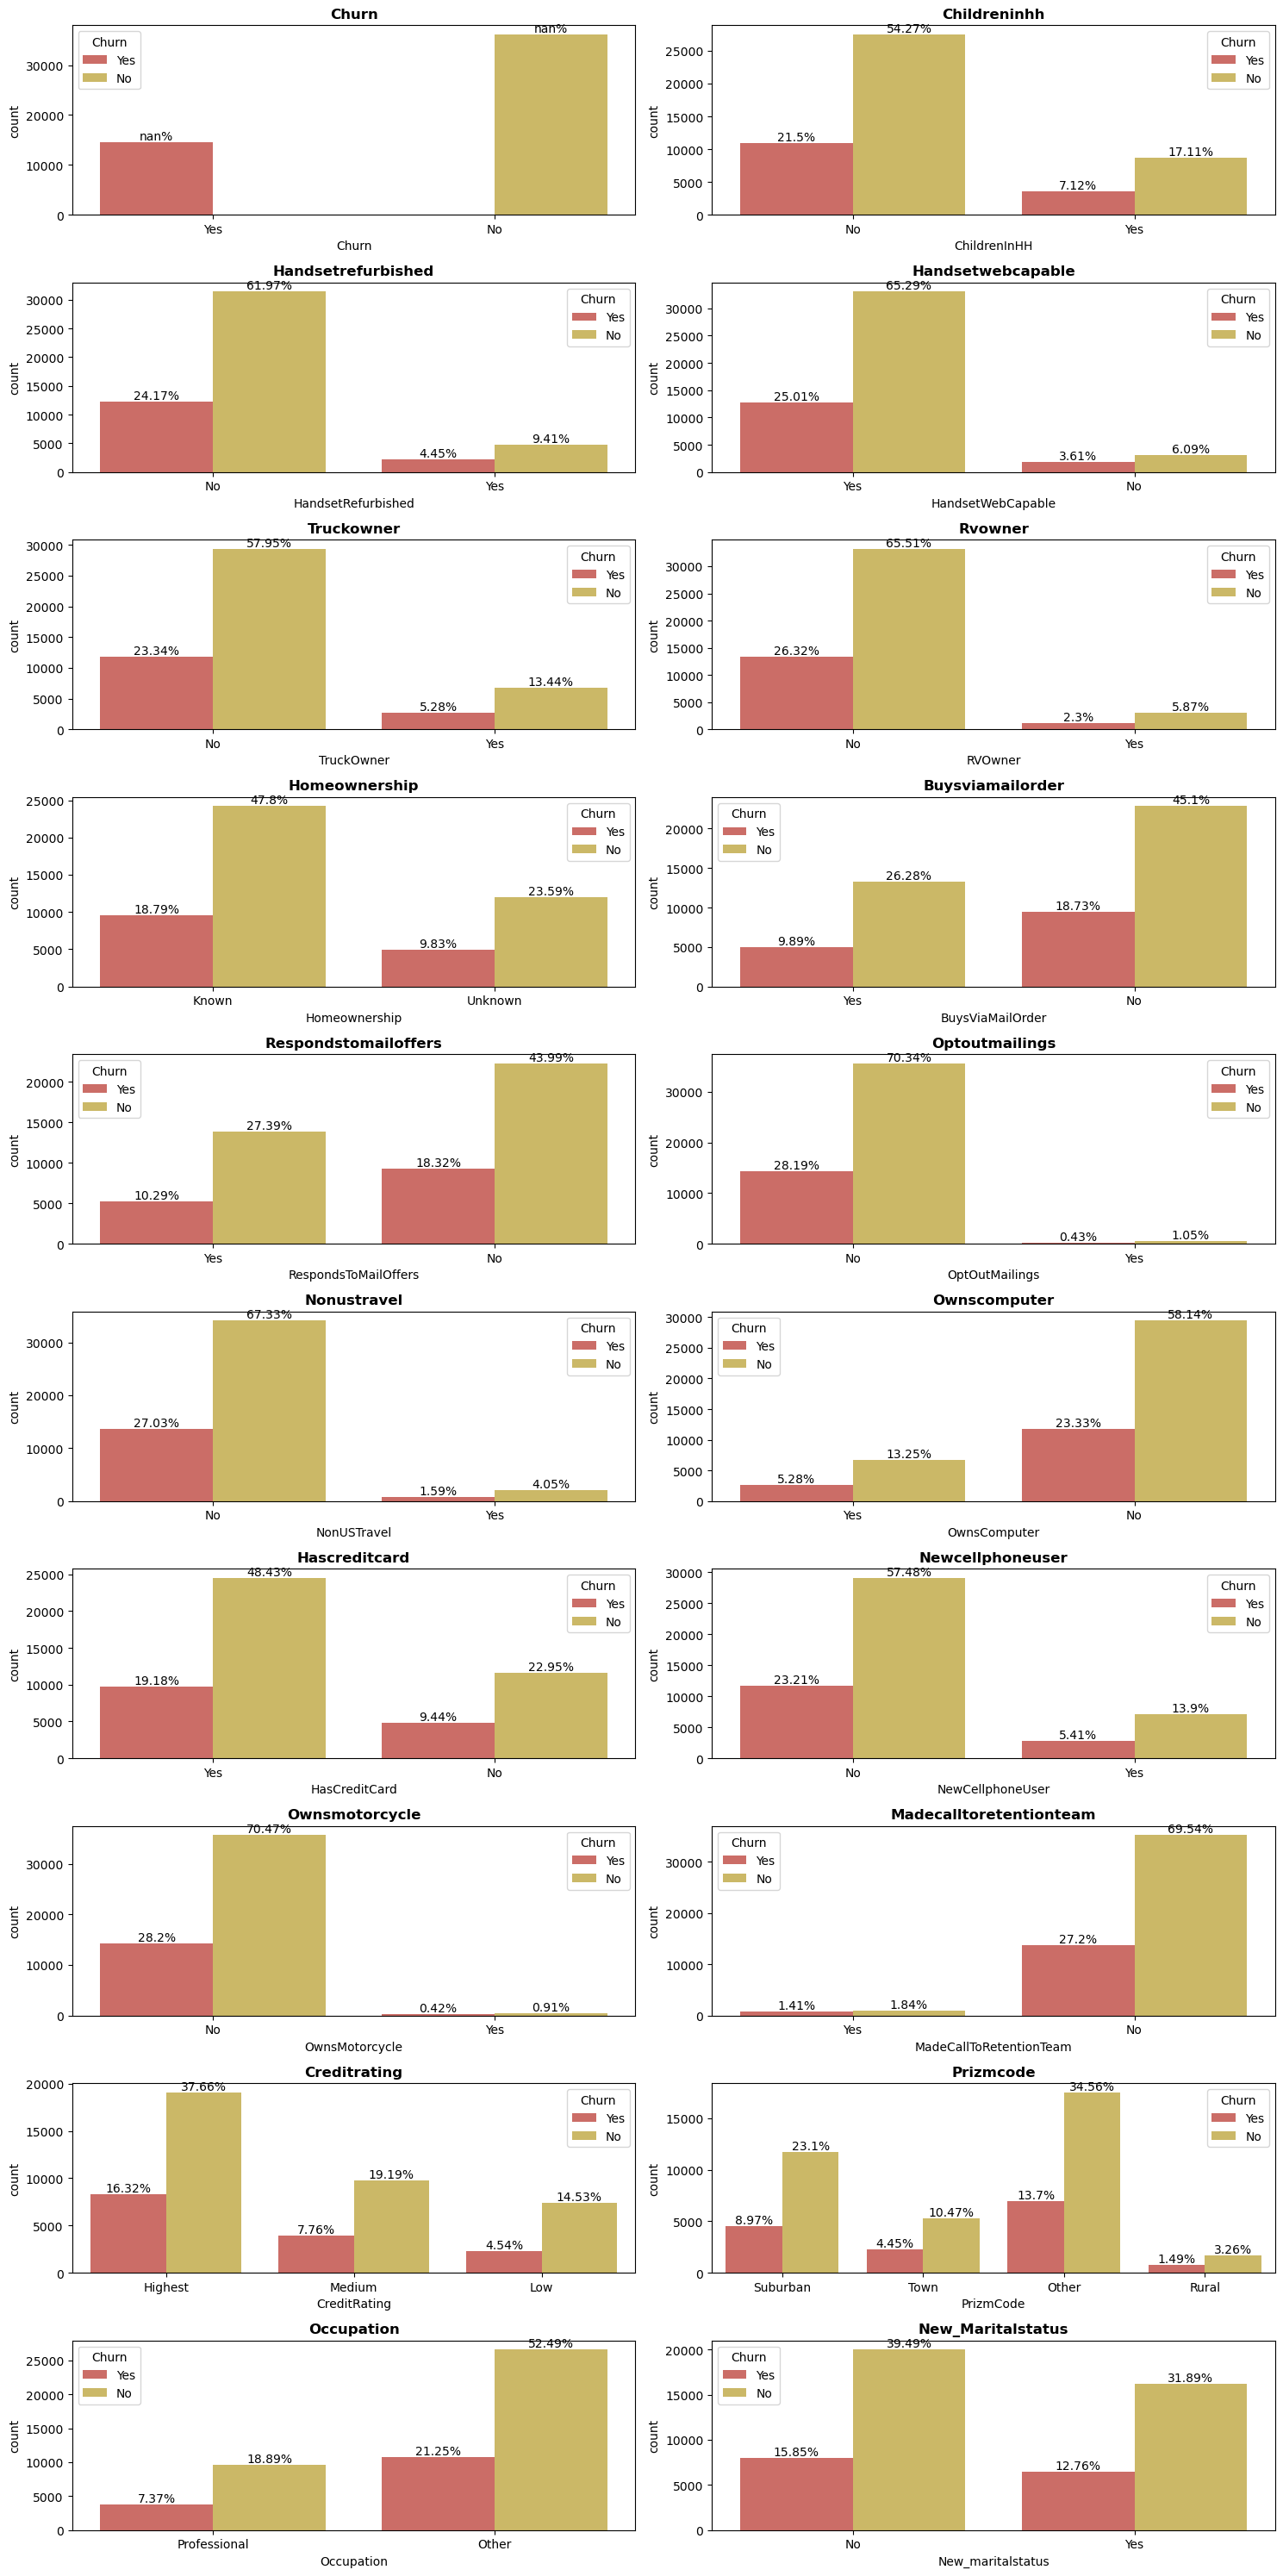

In [698]:
plt.figure(figsize=(15,30),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(10,2,n)
    n+=1
    sns.countplot(df[i],hue= df['Churn'] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

## observation:
In Handset web capability over 25% of people who have churned has more than 90% of Internet capability on their phone.


Less than 6% of people who own New phone have churned

Data show that people who have Credit Cards are more likely to Churn

Marital Status of people churning is independent

People who have responded mail offer are less likely to churn

## 4.3.Multivariate Analysis

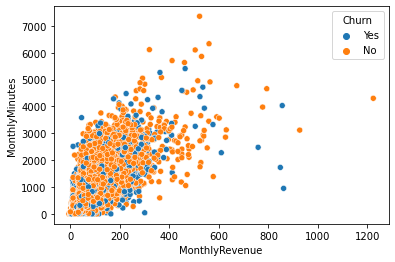

In [699]:
sns.scatterplot(x="MonthlyRevenue", y="MonthlyMinutes",hue='Churn', data=df)
plt.show()

# Observation
According plot as Monthly Revenue Increases, Then the number of Monthly Minutes increases, But we can't draw any conclusion on churn

#------------------------------------------------------------------------------------------------------------

# 5.Statistics(Stats)

# 5.1.Chi-Square Test for Independence
This test is used to test whether the categorical variables are independent or not.

𝐻0
: The variables are independent

𝐻1
: The variables are not independent (i.e. variables are dependent)

Here we can check if the catagorical features are dependent on our target.
We are assuming the level of confidence as 95%

In [700]:
df_cat.head(1)

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Highest,Suburban,Professional,No


In [701]:
df_cat_feat=df_cat.drop("Churn",axis=1)
df_target=df_cat["Churn"]

In [702]:
for i in df_cat_feat.columns:
    
    print("for: ",i)
    print("The null and alternative hypothesis is:")
    print(" ")
    print('H0: The variables {} and churn are independent'.format(i))
    print('H1: The variables {} and churn are not independent'.format(i))
    print('')
    table=pd.crosstab(df_cat_feat[i],df_target)
    observed_value=table.values
    
    # use the 'chi2_contingency()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
    # pass the observed values to the parameter, 'observed'
    # 'correction = False' will not apply the Yates' correction
    test_stat, p, dof, expected_value=chi2_contingency(observed_value,correction=False)
    
    print("Test statistic:", test_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected values:", '\n',expected_value)
    
    if p > 0.05:
        print('The above output shows that the chi-square the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and Churn are independent.'.format(i))
    else:
        print('The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and Churn are dependent.'.format(i))        
    print()

for:  ChildrenInHH
The null and alternative hypothesis is:
 
H0: The variables ChildrenInHH and churn are independent
H1: The variables ChildrenInHH and churn are not independent

Test statistic: 4.698156215718356
p-value: 0.030194993311185508
Degrees of freedom: 1
Expected values: 
 [[27409.49995067 10988.50004933]
 [ 8766.50004933  3514.49995067]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables ChildrenInHH and Churn are dependent.

for:  HandsetRefurbished
The null and alternative hypothesis is:
 
H0: The variables HandsetRefurbished and churn are independent
H1: The variables HandsetRefurbished and churn are not independent

Test statistic: 47.97838353216636
p-value: 4.309441911549537e-12
Degrees of freedom: 1
Expected values: 
 [[31163.51214507 12493.48785493]
 [ 5012.48785493  2009.51214507]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  

Test statistic: 144.79211724306955
p-value: 3.6206890545132067e-32
Degrees of freedom: 2
Expected values: 
 [[19527.43061229  7828.56938771]
 [ 6899.84443261  2766.15556739]
 [ 9748.72495511  3908.27504489]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables CreditRating and Churn are dependent.

for:  PrizmCode
The null and alternative hypothesis is:
 
H0: The variables PrizmCode and churn are independent
H1: The variables PrizmCode and churn are not independent

Test statistic: 18.839355979101004
p-value: 0.00029512488374545005
Degrees of freedom: 3
Expected values: 
 [[17457.33451726  6998.66548274]
 [ 1718.89358511   689.10641489]
 [11603.24552576  4651.75447424]
 [ 5396.52637187  2163.47362813]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables PrizmCode and Churn are dependent.

for:  Occupatio

In [703]:
print("The dependent categorical variable found after chi-square test for independence are: ")
print()
for i in df_cat_feat.columns:
    table=pd.crosstab(df_cat_feat[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p < 0.05:
        print(i)


The dependent categorical variable found after chi-square test for independence are: 

ChildrenInHH
HandsetRefurbished
HandsetWebCapable
Homeownership
BuysViaMailOrder
RespondsToMailOffers
MadeCallToRetentionTeam
CreditRating
PrizmCode


In [704]:
print("The independent categorical variable found after chi-square test for independence are: ")
print()
for i in df_cat_feat.columns:
    table=pd.crosstab(df_cat_feat[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p > 0.05:
        print(i)

The independent categorical variable found after chi-square test for independence are: 

TruckOwner
RVOwner
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
NewCellphoneUser
OwnsMotorcycle
Occupation
New_maritalstatus


# Checking significance for numerical features

In [705]:
df_num_feat=df_num.copy()
df_target=df_cat["Churn"]

In [706]:
# importing jarque_bera function from the scipy.stats library
from scipy.stats import jarque_bera

The null and alternative hypothesis for jarque_bera is given as:

𝐻0
 : The data is normally distributed.

𝐻1
 : The data is not normally distributed.

Assuming the level of confidence as 95%

In [707]:
def get_jarque_bera(Churn_Yes_set,Churn_No_set):
    stat_co,p_co=jarque_bera(Churn_Yes_set)
    stat_fp,p_fp=jarque_bera(Churn_No_set)
    if p_co >0.05 and p_fp >0.05:
        print("Since the p_value of both the Charged_Off_set and Fully_paid_set are greater then 0.05,we donot have enough evidence to reject the null hypothesis for both")
        print("Both sets are normally distributed")
    elif p_co <0.05 and p_fp< 0.05:
        print("Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis")
        print("Both sets are not normally distributed")
    elif p_co < 0.05 or p_fp < 0.05: 
        print('Since the pvalue of either the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis of the variable with p_value < 0.05 ')
        print('Either one of sets is not normaly distributed')

We will saperate each numerical column into two sets according to the target variable which are in this case Yes and No

In [708]:
for i in df_num.columns:
    print("Checking the normality of the two spearated sets of {} column according to the target".format(i))
    Churn_Yes_set=df[df["Churn"]=="Yes"][i]
    Churn_No_set=df[df["Churn"]=="No"][i]
    print(get_jarque_bera(Churn_Yes_set,Churn_No_set))
    print()

Checking the normality of the two spearated sets of MonthlyRevenue column according to the target
Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis
Both sets are not normally distributed
None

Checking the normality of the two spearated sets of MonthlyMinutes column according to the target
Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis
Both sets are not normally distributed
None

Checking the normality of the two spearated sets of TotalRecurringCharge column according to the target
Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis
Both sets are not normally distributed
None

Checking the normality of the two spearated sets of DirectorAssistedCalls column according to the target
Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis
Both

Since the p_value of both the Charged_Off_set and Fully_paid_set are less then 0.05,we reject the null hypothesis
Both sets are not normally distributed
None



Inference:

we can see that none of the sets of the numerical features separated by the target variables are normally distributed,therefore we can opt for kruskal wallis test to check its dependence on the target variable

The null and alternative hypothesis for kruskal wallis test is given as:

𝐻0
 : The data samples are with equal median (independent).

𝐻1
 : The data samples do not have equal median(i.e. variables are dependent).

Assuming the level of confidence as 95%

In [709]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [710]:
for i in df_num.columns:
    
    print('for: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and Churn are independent'.format(i))
    print('H1: The variables {} and Churn are not independent'.format(i))
    print('')
    
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and Churn are independent.'.format(i))
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and Churn are dependent.'.format(i))        

for:  MonthlyRevenue
The null and alternative hypothesis is:
 
H0: The variables MonthlyRevenue and Churn are independent
H1: The variables MonthlyRevenue and Churn are not independent

Test statistic: 26.53870020240826
p-value: 2.5831119673718165e-07
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyRevenue and Churn are dependent.
for:  MonthlyMinutes
The null and alternative hypothesis is:
 
H0: The variables MonthlyMinutes and Churn are independent
H1: The variables MonthlyMinutes and Churn are not independent

Test statistic: 194.2062602972561
p-value: 3.8392525154374923e-44
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyMinutes and Churn are dependent.
for:  TotalRecurringCharge
The null and alternative hypothesis is:
 
H0: The variables TotalRecurringCharge and Churn are independent
H1: The 

H0: The variables UniqueSubs and Churn are independent
H1: The variables UniqueSubs and Churn are not independent

Test statistic: 95.89866144056775
p-value: 1.2091711157650763e-22
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables UniqueSubs and Churn are dependent.
for:  ActiveSubs
The null and alternative hypothesis is:
 
H0: The variables ActiveSubs and Churn are independent
H1: The variables ActiveSubs and Churn are not independent

Test statistic: 21.812578453066553
p-value: 3.0062283847546045e-06
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables ActiveSubs and Churn are dependent.
for:  Handsets
The null and alternative hypothesis is:
 
H0: The variables Handsets and Churn are independent
H1: The variables Handsets and Churn are not independent

Test statistic: 66.37793750250603
p-value: 3.722453545449708e-16

In [711]:
print('The dependent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p < 0.05:
        print(i)

The dependent numerical variable found after H-test Test:

MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
PercChangeMinutes
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallWaitingCalls
MonthsInService
UniqueSubs
ActiveSubs
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2
RetentionCalls
RetentionOffersAccepted
ReferralsMadeBySubscriber
AdjustmentsToCreditRating


In [712]:
print('The independent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p > 0.05:
        print(i)

The independent numerical variable found after H-test Test:

RoamingCalls
PercChangeRevenues
CallForwardingCalls


In [713]:
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])
significant_variable

,Feature,Statistical Test,P-Value,Inference


In [714]:
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Dependent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Independent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
5,RoamingCalls,kruskal wallis test,0.922785,Independent numerical variable found after H-t...
6,PercChangeMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
7,PercChangeRevenues,kruskal wallis test,0.308102,Independent numerical variable found after H-t...
8,DroppedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
9,BlockedCalls,kruskal wallis test,0.000650,Dependent numerical variable found after H-tes...


In [715]:
for i in df_cat_feat.columns:
    table=pd.crosstab(df_cat_feat[i],df_target)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
5,RoamingCalls,kruskal wallis test,0.922785,Independent numerical variable found after H-t...
6,PercChangeMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
7,PercChangeRevenues,kruskal wallis test,0.308102,Independent numerical variable found after H-t...
8,DroppedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
9,BlockedCalls,kruskal wallis test,0.000650,Dependent numerical variable found after H-tes...


## Target variable

In [716]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,0,Medium income,No,0,Yes,Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Town,Professional,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,0,Medium income,No,0,No,Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,0,Low income,No,1,No,Highest,Other,Professional,Yes


In [717]:
dic={"Yes":1, "No":0}
df["Churn"]=df["Churn"].replace(dic)

In [718]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,1,0,0,0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,0,0,0,0
2,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,0,0,0,0
3,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,0,0,0,0
4,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,0,0,0,1


In [719]:
df_num.shape

(50679, 34)

# POWER TRANSFORMATION
As our data has both positive and negative values, we have used yeo-johnson power Transformation as it works for both.

from sklearn.preprocessing import PowerTransformer

In [720]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_num.drop("Churn",axis=1).columns:
    df_num[i]=PT.fit_transform(df_num[[i]])

In [721]:
df_num.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155


In [722]:
df_cat = df.select_dtypes(include=[np.object])
df_cat.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,IncomeGroup,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Medium income,No,Yes,Highest,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,Medium income,No,No,Medium,Suburban,Professional,Yes
2,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,Medium income,No,No,Medium,Town,Professional,Yes
3,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,Medium income,No,No,Medium,Other,Other,No
4,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Low income,No,No,Highest,Other,Professional,Yes


In [723]:
df_cat_enc= pd.get_dummies(df_cat, drop_first=True)
df_cat_enc.head()

,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


# Skewness After Transformation

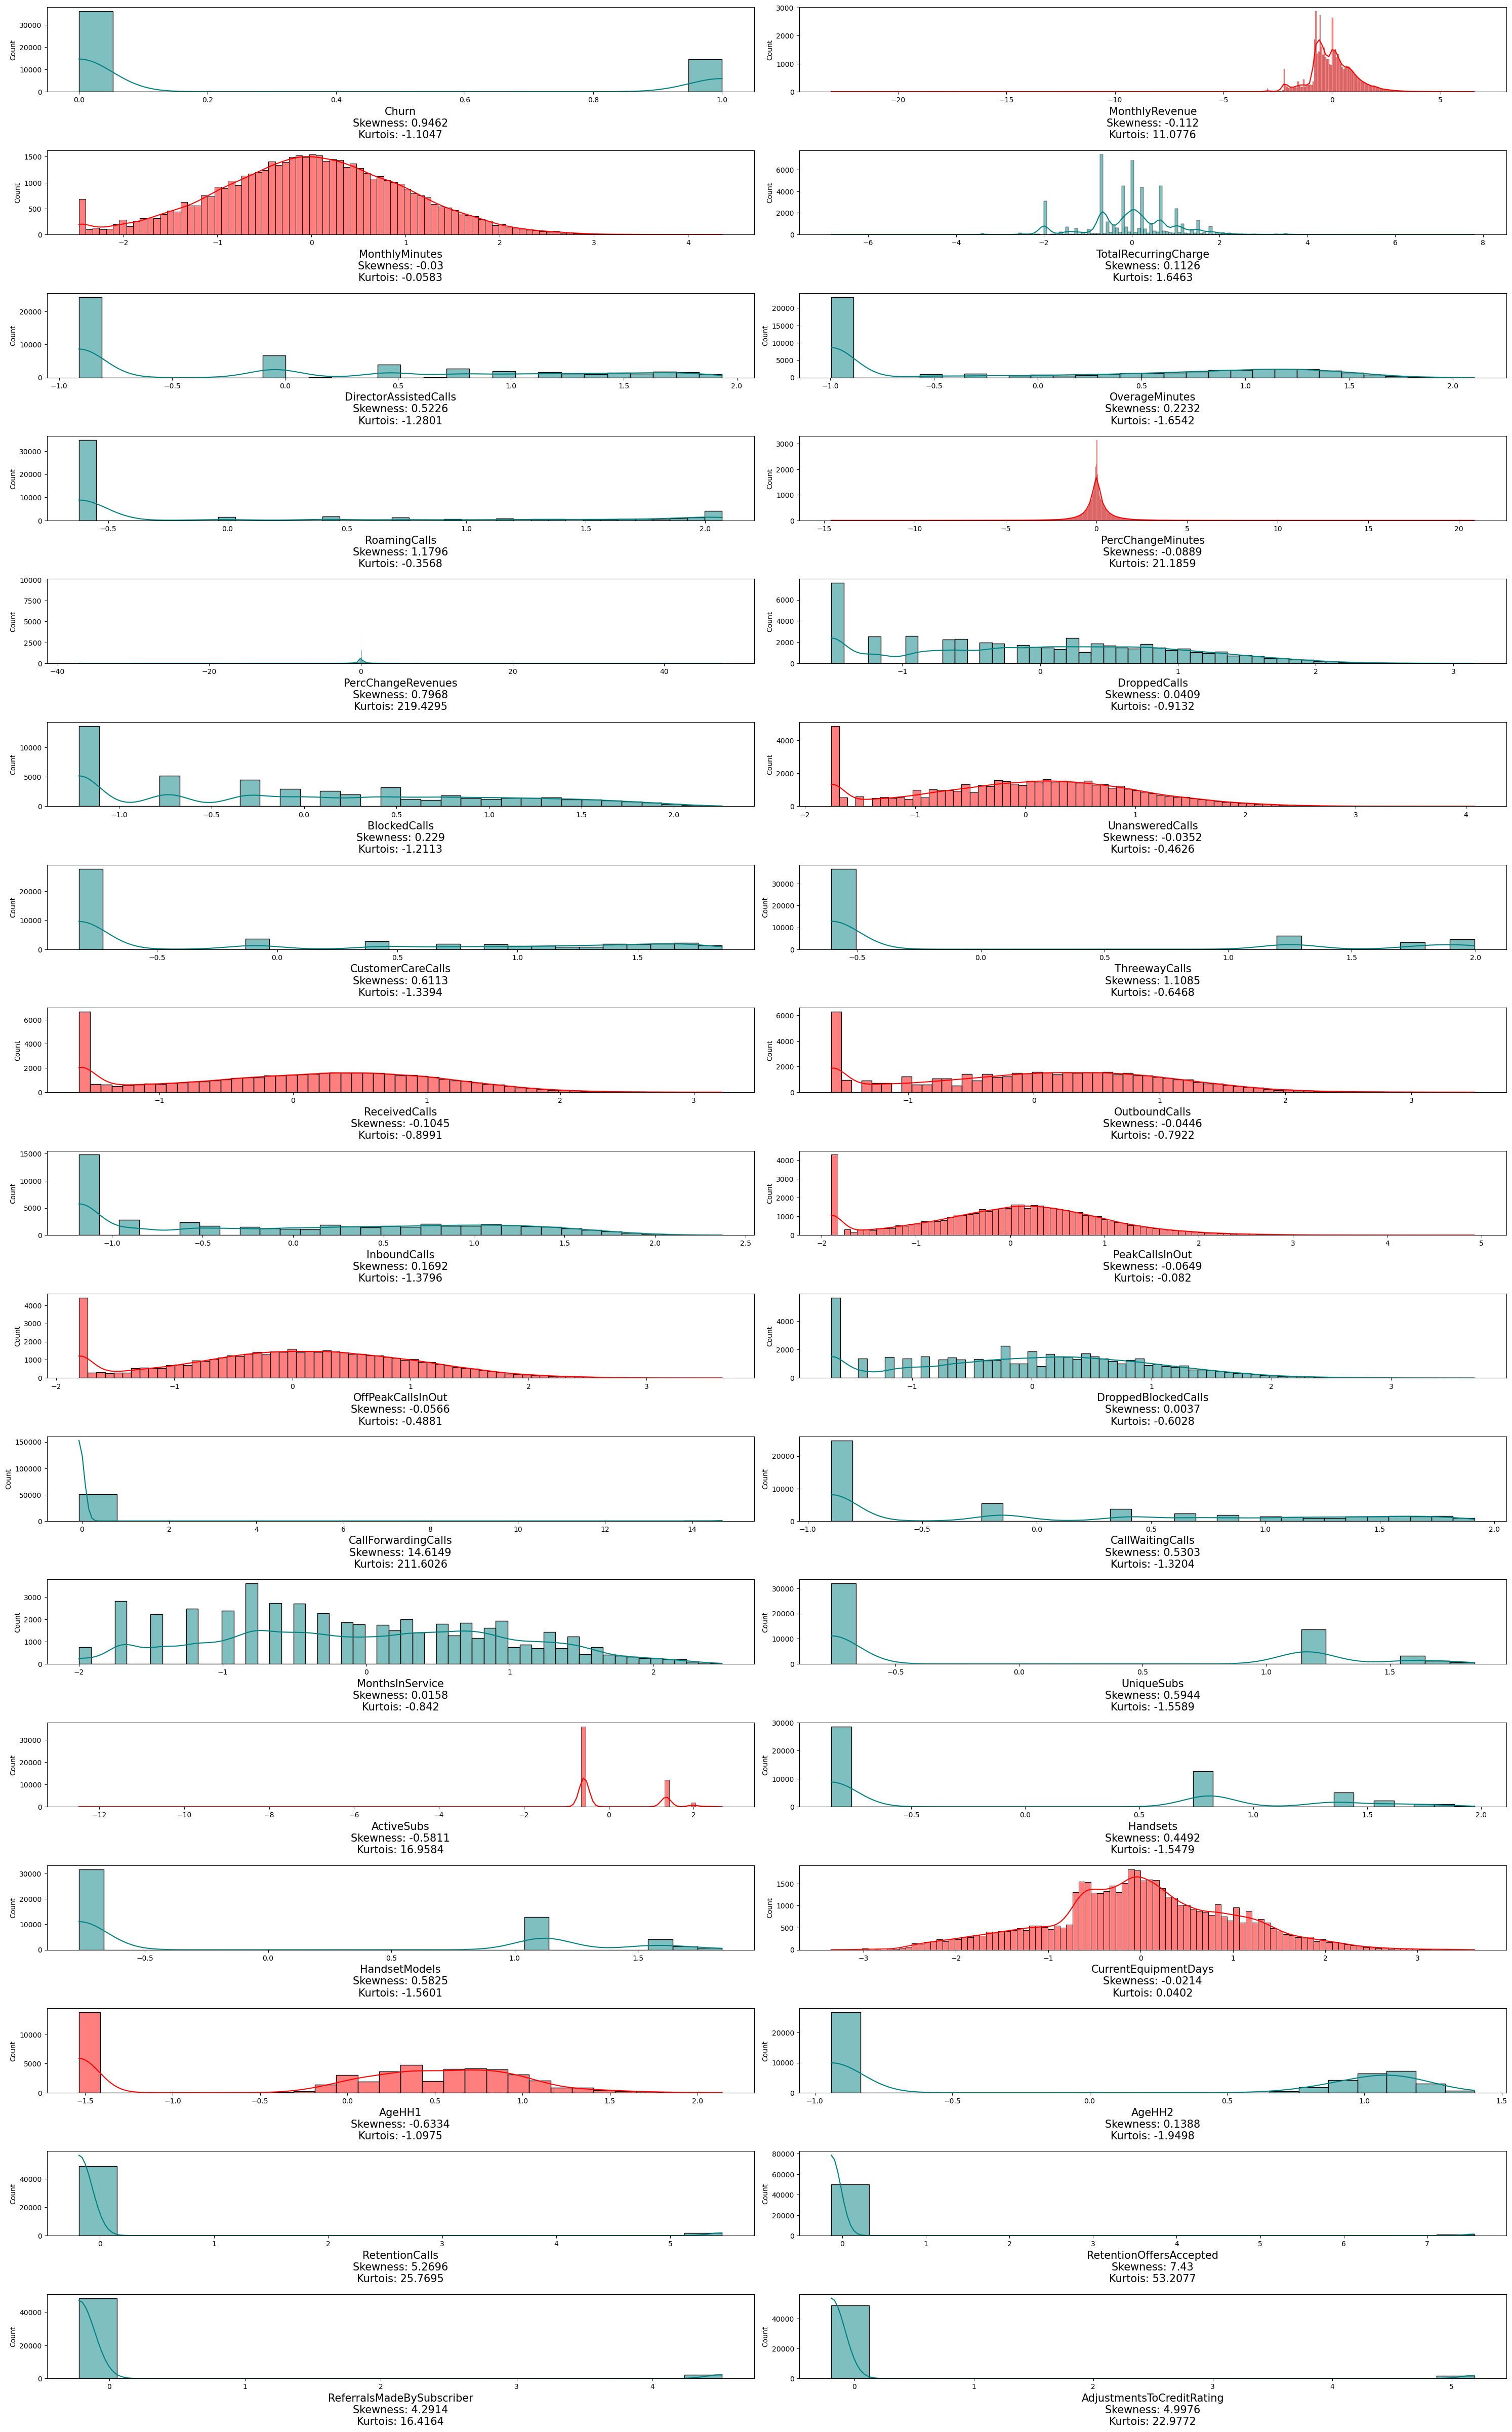

In [724]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(30,50),dpi=100)
n=1
for i in df_num.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df_num[i].skew() < 0 :
        sns.histplot(df_num[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df_num[i].skew(),4)}\nKurtois: {round(df_num[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df_num[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df_num[i].skew(),4)}\nKurtois: {round(df_num[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

Observation: By observing Above plot we can say that there is reduction in skewness

Concatenate scaled numerical and dummy encoded categorical variables

In [725]:
df_final = pd.concat([df_num,df_cat_enc], axis =1)
df_final.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [726]:
df_final.shape

(50679, 58)

In [728]:
df_final.to_csv('data_eda_1.csv',sep=',')